In [1]:
!mkdir -p results results/dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_breakout

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('BreakoutDeterministic-v4')
env = Monitor(env, './monitor/dqn/breakout', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(4)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_breakout, 
    replay_memory_size=0,
    render_mode='rgb_array'
)
agent.model.load_weights('./models/dqn/breakout.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<BreakoutDeterministic-v4>>>>,
    downsample=Downsampler(y=(32, 14), x=(8, 8), cut=[142]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x10b887fd0>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x110caa158>,
    image_size=(84, 84),
    render_mode='human'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [10:42<00:00,  6.43s/game]


0     34.0
1     31.0
2     39.0
3     33.0
4     65.0
5     39.0
6     27.0
7     27.0
8     34.0
9     23.0
10    37.0
11    41.0
12    39.0
13    40.0
14    37.0
15    23.0
16    36.0
17    43.0
18    30.0
19    38.0
20    28.0
21    23.0
22    39.0
23    33.0
24    43.0
25    27.0
26    44.0
27    27.0
28    24.0
29    38.0
      ... 
70    37.0
71    36.0
72    40.0
73    38.0
74    45.0
75    42.0
76    36.0
77    40.0
78    40.0
79    21.0
80    33.0
81    24.0
82    40.0
83    40.0
84    49.0
85    32.0
86    40.0
87    33.0
88    29.0
89    28.0
90    48.0
91    28.0
92    37.0
93    38.0
94    37.0
95    38.0
96    37.0
97    33.0
98    39.0
99    35.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/dqn/fullydeterministic.csv')

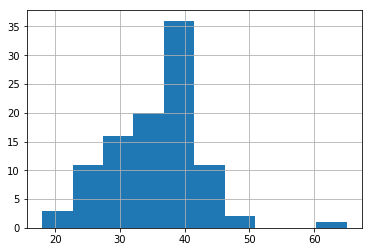

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.000000
mean      35.430000
std        6.988092
min       18.000000
25%       31.000000
50%       36.500000
75%       40.000000
max       65.000000
dtype: float64